In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
red = pd.read_csv('dataset/dataset/winequality-red.csv', sep=";")
white = pd.read_csv('dataset/dataset/winequality-white.csv', sep=";")

wine = pd.concat([red, white])
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# 와인 품질 다중분류

In [16]:
print(wine['quality'].value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


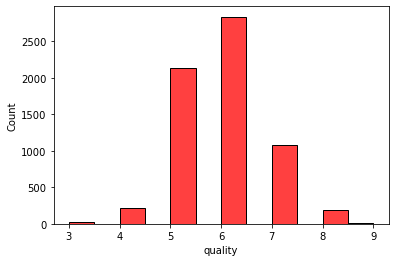

In [17]:
sns.histplot(wine['quality'], color= 'red', binwidth=0.5)
plt.show()

데이터 개수의 편차가 큰데 어떻게 해야할까?

1. quality를 (3, 4, 5), 6, (7, 8, 9)로 묶어서 다중분류 할 수 있다.
2. 또는 데이터를 증폭할 수 있다.
    - 절대 많은 데이터를 잘라내지 말 것

## 1. 데이터 개수의 균형 맞추기

### 1.1 Bad, Normal, Good의 세개로 나눈다.

In [18]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] <= 5, 'new_quality'] = 2

새로운 종속변수가 된 new_quality를 quality로부터 생성했으므로 quality를 제거한다. 

In [19]:
del wine['quality']
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,NaN


## 2. 데이터 정제 : 정규화

정규화는 보통 독립변수에만 하는데 여기서는 독립, 종속변수 모두 min-max 취하겠다.
- 왜?
    - 지금 종속변수가 0, 1, 2이기 때문

**Min Max Normalization**

$$\frac{x - x_{min}}{IQR (= x_{Max} - x_{min})}$$

In [20]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

In [21]:
# 값 자체의 성질은 유지하면서 값만 바뀐다. 
# (ex: 0, 1, 2가 0, 0.5, 1이 된다.)

print(wine['new_quality'][:10])
print(wine_norm['new_quality'][:10])

0    2.0
1    2.0
2    2.0
3    1.0
4    2.0
5    2.0
6    2.0
7    NaN
8    NaN
9    2.0
Name: new_quality, dtype: float64
0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
5    1.0
6    1.0
7    NaN
8    NaN
9    1.0
Name: new_quality, dtype: float64


In [22]:
wine_shuffle    = wine_norm.sample(frac=1)
wine_np         = wine_shuffle.to_numpy()

In [23]:
train_ratio = 0.8

train_idx = int(len(wine_np) * train_ratio)
print(train_idx)

5197


In [ ]:
# one hot encoding
# 종속변수 세 개 이므로 num_classes : 3
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 3)